# Import libraries & read csv files

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime as dt
warnings.filterwarnings('ignore')

# Read csv files
sales = pd.read_csv('Sales.csv')
products = pd.read_csv('Products.csv')
stores = pd.read_csv('Stores.csv')
exchange = pd.read_csv('Exchange_Rates.csv')
customers = pd.read_csv('Customers.csv',encoding='ISO-8859-1')

# Describe csv files

In [2]:
# Checking sale file
print ("=== Checking Sale file's information ===")
sales.info(show_counts=True)
sales.isnull().sum()
sales.describe()


=== Checking Sale file's information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [3]:
# Checking product file
print ("=== Checking Product file's information ===")
products.info(show_counts=True)
products.isnull().sum()
products.describe()

=== Checking Product file's information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


In [4]:
# Checking customer file
print ("=== Checking Customer file's information ===")
customers.info(show_counts=True)
customers.isnull().sum()
customers.describe()

=== Checking Customer file's information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


,CustomerKey
count,1.526600e+04
mean,1.060508e+06
std,6.127097e+05
min,3.010000e+02
25%,5.140335e+05
50%,1.079244e+06
75%,1.593980e+06
max,2.099937e+06


# Change data type

In [5]:
# Changing data type for Sale data frame
sales['Order Date'] = pd.to_datetime(sales['Order Date'],format='%m/%d/%Y')
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'],format='%m/%d/%Y')

# Changing data type for Product data frame
## Remove dolar sign in Unit Cost USD and Unit Price USD
remove_dolar_sign = lambda x: x[1:]
products['Unit Cost USD'] = products['Unit Cost USD'].apply(remove_dolar_sign).str.strip().str.replace(',', '', regex=True)
products['Unit Price USD'] = products['Unit Price USD'].apply(remove_dolar_sign).str.strip().str.replace(',', '', regex=True)
## Convert Unit Cost USD and Unit Price USD to float data type
products['Unit Cost USD'] = products['Unit Cost USD'].astype(float)
products['Unit Price USD'] = products['Unit Price USD'].astype(float)

# Changing data type for Product data frame
customers['Birthday'] = pd.to_datetime(customers['Birthday'],format='%m/%d/%Y')

# Join tables

In [6]:
# Join sales, product and customer together
full_table = pd.merge(
    left=sales,
    right=products,
    how= 'left',
    on= 'ProductKey',
).merge(
    right=customers,
    how= 'left',
    on= 'CustomerKey'
)

# Adding total sale and total cost
full_table['Total Sale'] = full_table['Quantity'] * full_table['Unit Price USD']
full_table['Total Cost'] = full_table['Quantity'] * full_table['Unit Cost USD']
# Adding time columns
full_table['Order Month'] = full_table['Order Date'].dt.month
full_table['Order Month Name'] = full_table['Order Date'].dt.strftime('%b %Y')
full_table['Order Year'] = full_table['Order Date'].dt.year

In [7]:
full_table.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,...,State,Zip Code,Country,Continent,Birthday,Total Sale,Total Cost,Order Month,Order Month Name,Order Year
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,...,Ontario,N5W 5K6,Canada,North America,1971-03-23,68.00,31.27,1,Jan 2016,2016
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,...,California,93602,United States,North America,1995-11-20,854.00,282.94,1,Jan 2016,2016
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,...,California,93602,United States,North America,1995-11-20,665.94,220.64,1,Jan 2016,2016
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,...,Alberta,T4N 2A6,Canada,North America,1962-08-24,2254.00,1036.56,1,Jan 2016,2016
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,...,Alberta,T4N 2A6,Canada,North America,1962-08-24,326.00,166.20,1,Jan 2016,2016


# Explore data analysis

In [8]:
# Total sale per year
yearly_sale = full_table.groupby('Order Year').agg(
    Total_Sale=('Total Sale', 'sum'),
    Total_Cost=('Total Cost', 'sum')
).reset_index()

yearly_sale['Profit_Margin'] = round((yearly_sale['Total_Sale']-yearly_sale['Total_Cost'])/yearly_sale['Total_Sale'],4)*100

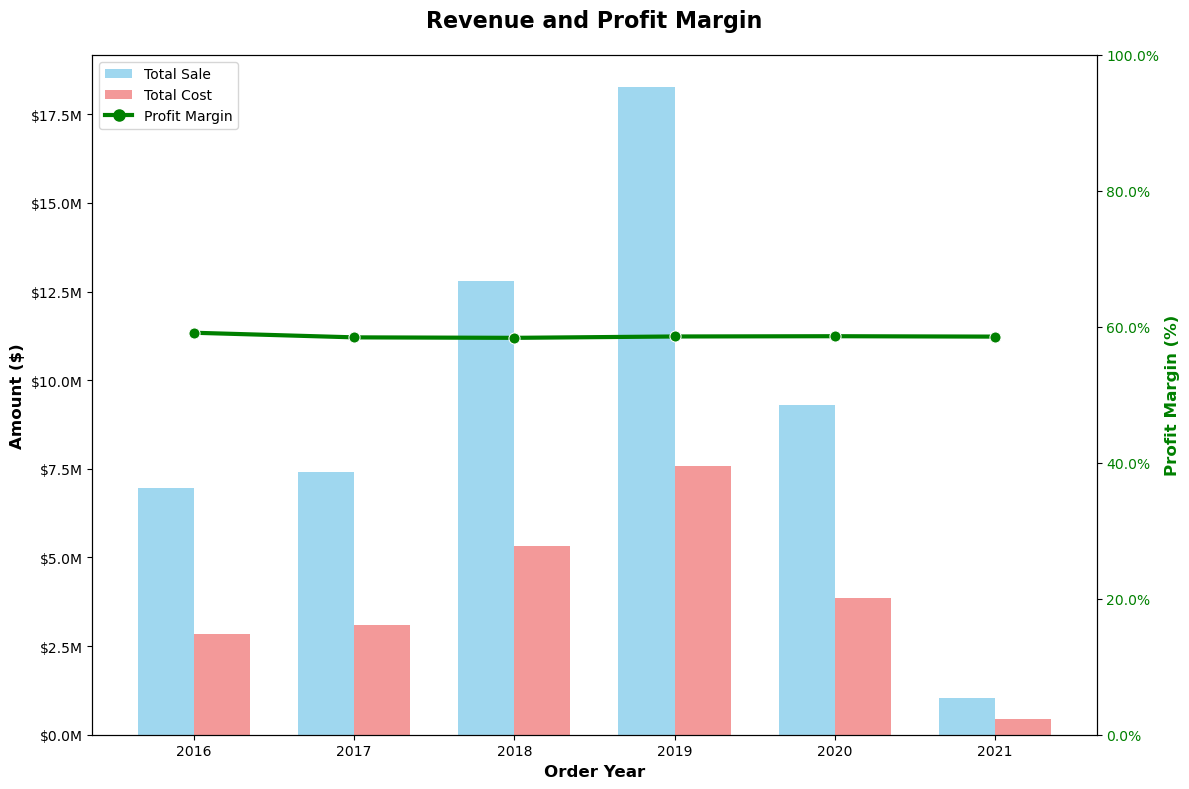

In [9]:
# Set up the matplotlib figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))
# Create bar chart for Total_Sale and Total_Cost
x = np.arange(len(yearly_sale['Order Year']))
width = 0.35
# Plot bars
bars1 = ax1.bar(x - width/2, yearly_sale['Total_Sale'], width, label='Total Sale', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, yearly_sale['Total_Cost'], width, label= 'Total Cost', color='lightcoral', alpha=0.8)
# Configure left y-axis (for bars)
ax1.set_xlabel('Order Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Amount ($)', fontsize=12, fontweight='bold', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(yearly_sale['Order Year'])
ax1.tick_params(axis='y', labelcolor='black')
# Format y-axis to show values in millions
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
# Create second axis for line plot
ax2 = ax1.twinx()
sns.lineplot(data = yearly_sale, x = x, y='Profit_Margin', ax = ax2, color='green', marker='o', linewidth=3, markersize=8)
ax2.set_ylabel('Profit Margin (%)', fontsize=12, fontweight='bold', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(bottom=0, top=100)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
# Update legend
handles1, labels1 = ax1.get_legend_handles_labels()
line_handle = plt.Line2D([0], [0], color='green', marker='o', linewidth=3, markersize=8)
ax1.legend(handles1 + [line_handle], labels1 + ['Profit Margin'], loc='upper left', frameon=True)

plt.title('Revenue and Profit Margin', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [10]:
# Total sale by continent
continent_sale = full_table.groupby('Continent').agg(
    Sale=('Total Sale', 'sum')
).reset_index()
continent_sale['Sale Proportion'] = round(continent_sale['Sale']/continent_sale['Sale'].sum(),4)*100
continent_sale

,Continent,Sale,Sale Proportion
0,Australia,2708137.61,4.86
1,Europe,18451376.18,33.09
2,North America,34595965.80,62.05


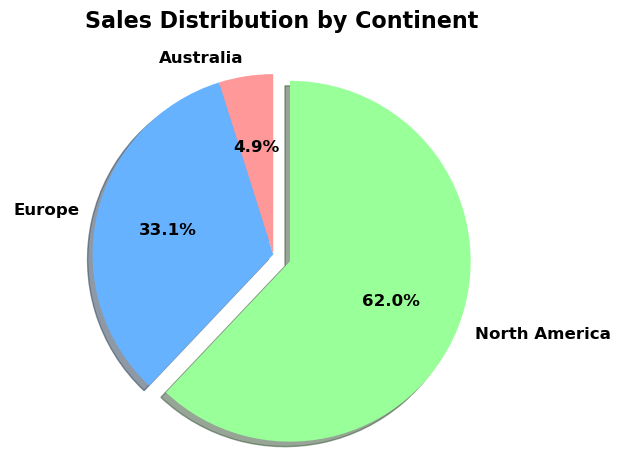

In [11]:
# Create a pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99']  # Light red, blue, green
explode = (0, 0, 0.1)  # Explode the largest slice (North America)
wedges, texts, autotexts = plt.pie(
    continent_sale['Sale'], 
    labels=continent_sale['Continent'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
# Customize the appearance
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# Add title
plt.title('Sales Distribution by Continent', fontsize=16, fontweight='bold', pad=20)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

In [12]:
# Total sale by country
Country_sale = full_table.groupby('Country').agg(
    Sale=('Total Sale', 'sum'),
    Quantity = ('Quantity','sum')
).reset_index()
Country_sale['Average Spending'] = round(Country_sale['Sale'] / Country_sale['Quantity'],2)
Country_sale = Country_sale.sort_values(by='Sale', ascending=False)
Country_sale

,Country,Sale,Quantity,Average Spending
7,United States,29871631.17,106407,280.73
6,United Kingdom,7084088.12,25298,280.03
3,Germany,5414149.80,18943,285.81
1,Canada,4724334.63,16793,281.33
0,Australia,2708137.61,9209,294.08
4,Italy,2475645.77,8470,292.28
5,Netherlands,1962154.27,7252,270.57
2,France,1515338.22,5385,281.40


Text(0.5, 1.0, 'Quantity Sold vs Average Spending by Country')

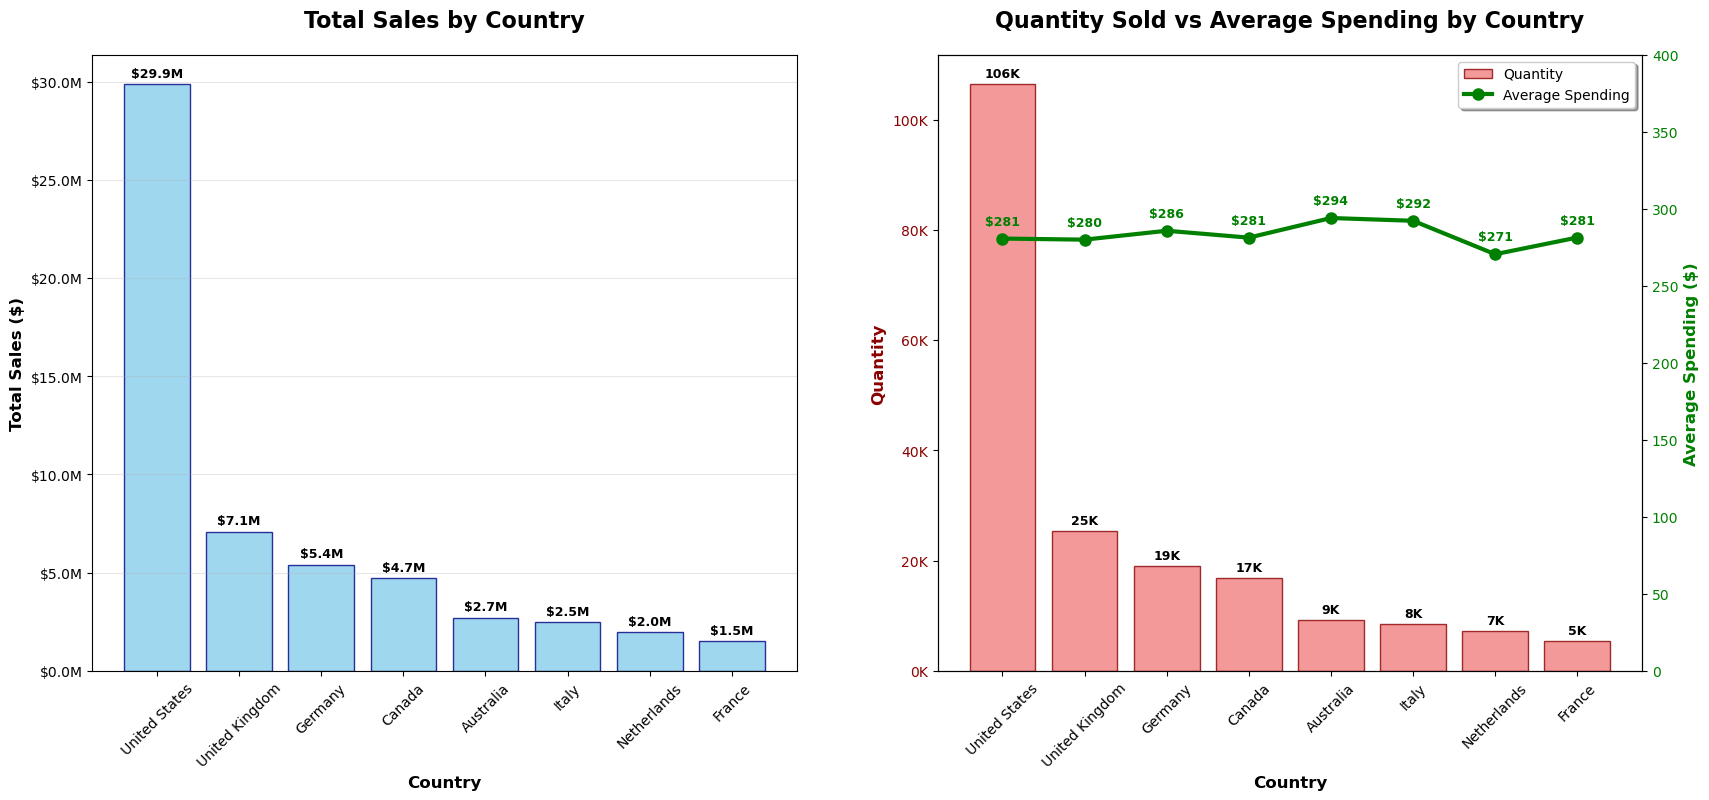

In [13]:
# Set up the figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
# ===== FIRST CHART: Bar Chart for Country and Sale =====
# Create bar chart
bars1 = ax1.bar(Country_sale['Country'], Country_sale['Sale'], color='skyblue', alpha=0.8, edgecolor='navy', linewidth=1)
# Customize first chart
ax1.set_title('Total Sales by Country', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Country', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
# Format y-axis to show values in millions
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'${height/1e6:.1f}M',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add grid for better readability
ax1.grid(True, alpha=0.3, axis='y')
# ===== SECOND CHART: Combined Bar and Line Chart =====
# Create bar chart for quantity
x_pos = np.arange(len(Country_sale['Country']))
bars2 = ax2.bar(x_pos, Country_sale['Quantity'], 
                color='lightcoral', alpha=0.8, edgecolor='darkred', linewidth=1,
                label='Quantity')
# Configure left y-axis (for bars)
ax2.set_xlabel('Country', fontsize=12, fontweight='bold')
ax2.set_ylabel('Quantity', fontsize=12, fontweight='bold', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(Country_sale['Country'], rotation=45, fontsize=10)

# Format quantity axis
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
# Create second y-axis for average spending line
ax2_twin = ax2.twinx()
line = ax2_twin.plot(x_pos, Country_sale['Average Spending'], 
                     color='green', marker='o', linewidth=3, markersize=8,
                     label='Average Spending')
# Configure right y-axis (for line)
ax2_twin.set_ylabel('Average Spending ($)', fontsize=12, fontweight='bold', color='green')
ax2_twin.tick_params(axis='y', labelcolor='green')
ax2_twin.set_ylim(bottom=0, top=400)
# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.annotate(f'{height/1000:.0f}K',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold')
# Add value labels on line points
for i, v in enumerate(Country_sale['Average Spending']):
    ax2_twin.annotate(f'${v:.0f}',
                     (i, v), textcoords="offset points",
                     xytext=(0, 10), ha='center', fontsize=9, 
                     color='green', fontweight='bold')

# Combine legends from both y-axes
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
          frameon=True, fancybox=True, shadow=True)

# Set title for second chart
ax2.set_title('Quantity Sold vs Average Spending by Country', 
              fontsize=16, fontweight='bold', pad=20)

In [14]:
# Top 5 sold Category Products
top_5_product = full_table.groupby('Category').agg(
    Quantity = ('Quantity','sum')
)
top_5_product = top_5_product.sort_values(by='Quantity',ascending=False).reset_index()
top_5_product

,Category,Quantity
0,Computers,44151
1,Cell phones,31477
2,"Music, Movies and Audio Books",28802
3,Audio,23490
4,Games and Toys,22591
5,Home Appliances,18401
6,Cameras and camcorders,17609
7,TV and Video,11236


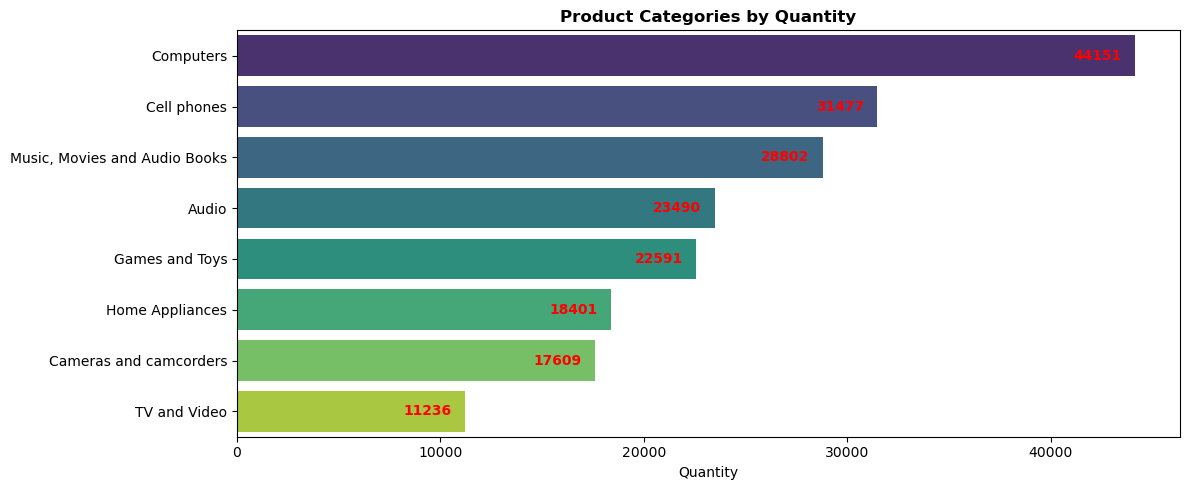

In [15]:
# Set up the matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 5))
# Plot bars
bar = sns.barplot(data= top_5_product,x='Quantity',y= 'Category', palette='viridis', width= 0.8)
plt.title('Product Categories by Quantity', fontdict={'fontsize': 12, 'weight': 'bold', 'color': 'black'})
plt.ylabel(ylabel='')
# Add data labels
for p in bar.patches:
    bar.annotate(f'{p.get_width():.0f}', 
                 (p.get_width()-1000, p.get_y() + p.get_height()/2), 
                 ha='right', va='center', 
                 color='red', 
                 fontsize=10, 
                 fontweight='bold',
                 xytext=(5, 0), 
                 textcoords='offset points')
plt.tight_layout()
plt.show()

In [75]:
# Customer retention analysis
# Create a new customer order
df_customer = full_table[['CustomerKey','Order Date','Order Year']]
df_customer['First Purchase'] = df_customer.groupby('CustomerKey')['Order Date'].transform('min').dt.year
df_customer['Period Number'] = df_customer['Order Year'] - df_customer['First Purchase']
# Count unique customers in each cohort period
cohort_data = df_customer.groupby(['First Purchase','Period Number'])['CustomerKey'].nunique().reset_index()
# Create cohort table
cohort_counts = cohort_data.pivot(index='First Purchase',columns='Period Number', values='CustomerKey')
# Get cohort sizes (first period)
cohort_sizes = cohort_counts.iloc[:, 0]
# Calculate retention rates
retention_table = cohort_counts.divide(cohort_sizes, axis=0)
retention_table.reset_index().set_index('First Purchase',inplace=True)
retention_table = retention_table

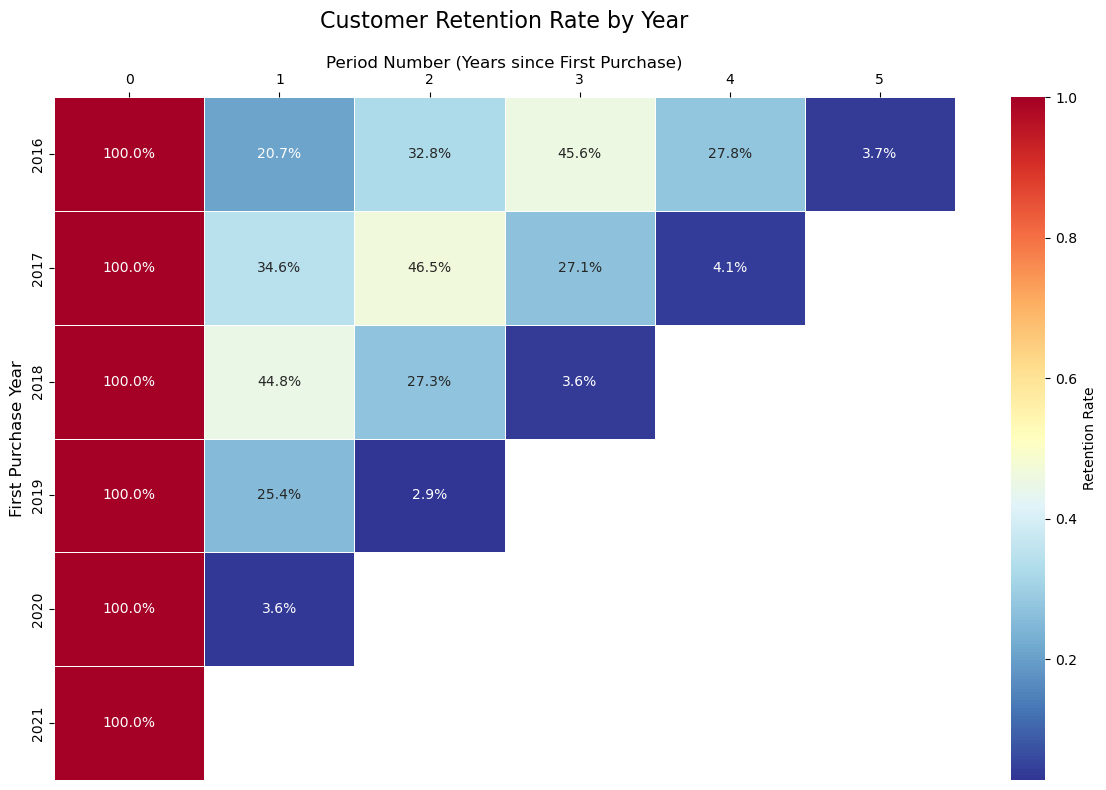

In [82]:
# Create a map to show retention rate
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_table,
    annot=True,
    fmt='.1%',
    cmap= 'RdYlBu_r',
    linewidths=0.5,
    cbar_kws={'label': 'Retention Rate'},
    square=False
)
plt.title('Customer Retention Rate by Year', fontsize=16, pad=20)
plt.xlabel('Period Number (Years since First Purchase)', fontsize=12)
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.ylabel('First Purchase Year', fontsize=12)
plt.tight_layout()
plt.show()